In [2]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import os
import PIL
from skimage.filters import threshold_otsu, sobel

In [3]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-08-08 10:22:40.696831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
Skipping image, no lines found.
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful


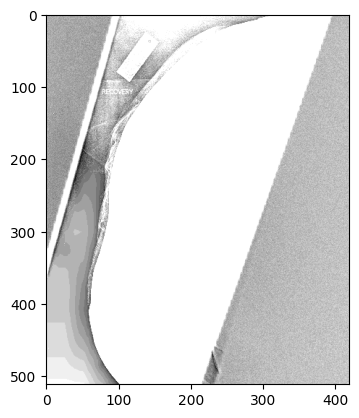

In [1]:
import hough
import cv2
import matplotlib.pyplot as plt
import os


folder_path = '/home/clr/Thesis/pre-processing/Humerus/'  
n=100 #number of images u want to process in the folder 
image_output, skipped_images = hough.hough_transform(folder_path,n)

In [2]:
image_files = os.listdir(folder_path)


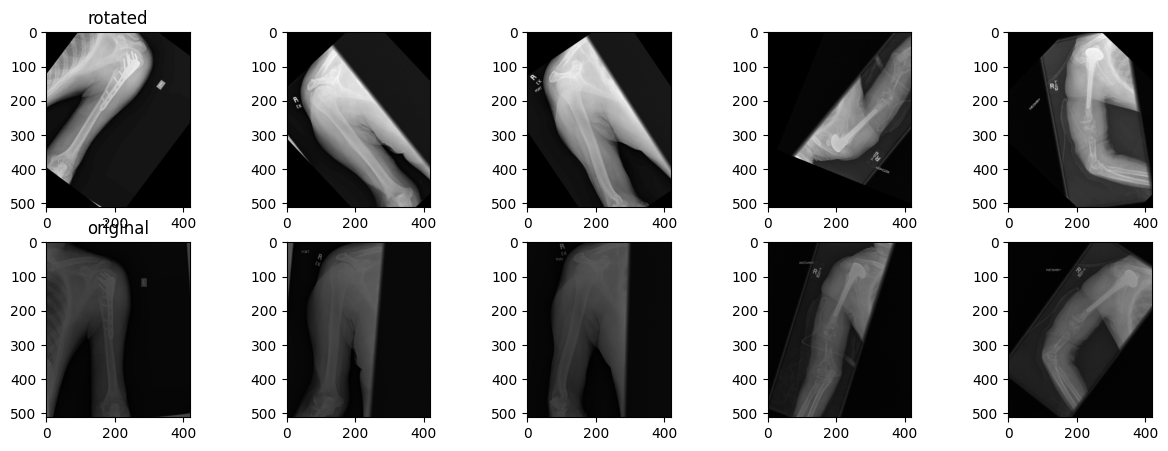

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax[0][0].imshow(image_output[0], cmap='gray')
ax[0][0].set_title("rotated")
ax[0][1].imshow(image_output[1], cmap='gray')
ax[0][2].imshow(image_output[2], cmap='gray')
ax[0][3].imshow(image_output[3], cmap='gray')
ax[0][4].imshow(image_output[4], cmap='gray')
ax[1][0].imshow(cv2.imread(folder_path+image_files[0]), cmap='gray')
ax[1][0].set_title("original")
ax[1][1].imshow(cv2.imread(folder_path+image_files[1]), cmap='gray')
ax[1][2].imshow(cv2.imread(folder_path+image_files[2]), cmap='gray')
ax[1][3].imshow(cv2.imread(folder_path+image_files[3]), cmap='gray')
ax[1][4].imshow(cv2.imread(folder_path+image_files[4]), cmap='gray')

Rotation with box

In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
import os
import PIL
from skimage.filters import threshold_otsu, sobel


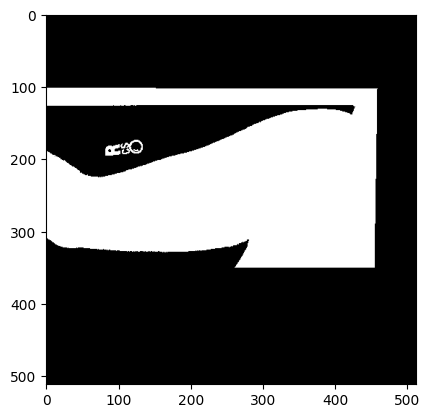

In [2]:
# image_path = "/home/clr/Thesis/pre-processing/Humerus/MURA-v1.1-train-XR_HUMERUS-patient00246-study1_negative-image1.png"
image_path = "/home/clr/Thesis/HoughTransform_xray/sample images/MURA-v1.1-train-XR_HUMERUS-patient00466-study1_negative-image2.png"
im_gray = np.array(Image.open(image_path).convert('L'))

threshold = threshold_otsu(im_gray)
threshold -= threshold *0.20
bina_image = im_gray < threshold
inverted_bina_image = np.logical_not(bina_image)

# Convert the inverted binary image (numpy array) to a Pillow Image object
inverted_binary_image_pil = Image.fromarray(np.uint8(inverted_bina_image) * 255)
plt.imshow(inverted_binary_image_pil, cmap='gray')

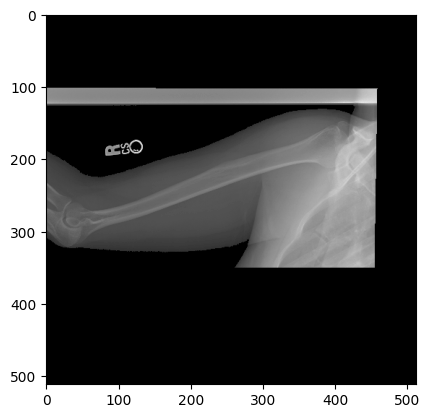

In [3]:
#removed image background after thresholding
background_removed_image = np.zeros_like(im_gray)
background_removed_image[inverted_bina_image] = im_gray[inverted_bina_image]
background_removed_image_pil = Image.fromarray(background_removed_image)

plt.imshow(background_removed_image_pil, cmap='gray')

[[-8.0503845e-01  3.4914722e+02]
 [ 1.6021729e-03  1.0150815e+02]
 [ 4.5800000e+02  1.0300000e+02]
 [ 4.5719336e+02  3.5063907e+02]]


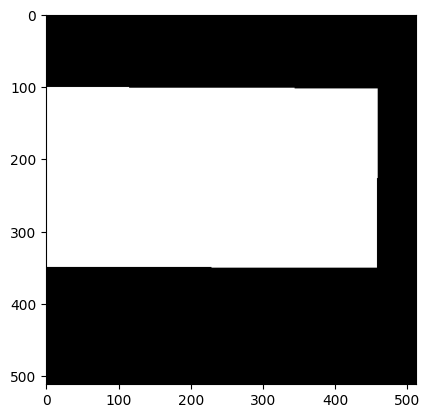

In [4]:


# Assuming you have already thresholded binary image 'inverted_bina_image'

# Find contours in the binary image
contours, _ = cv2.findContours(np.uint8(inverted_binary_image_pil), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
best_rect = None
best_rect_area = 0

# Iterate through all contours and find the best fitting rectangle
for contour in contours:
    # Fit a rotated rectangle around the contour
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box_area = rect[1][0] * rect[1][1]

    # Check if the current rectangle has larger area than the previous best
    if box_area > best_rect_area:
        best_rect = box
        best_rect_area = box_area

print(best_rect)
# Draw the rotated rectangle on the original image
original_image = np.array(inverted_binary_image_pil)
drawn_image = original_image.copy()
cv2.drawContours(drawn_image, [np.int0(best_rect)], 0, (255, 255, 255), -1)


# Show the final image with the enclosing rotated rectangle
plt.imshow(drawn_image, cmap='gray')
plt.show()

(256, 256)
(123.0, 229.0)


/tmp/ipykernel_14170/3583068741.py:15: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt((x2 - x1)^2 + (y2 - y1)^2)


Text(0.5, 1.0, 'Detected Lines')

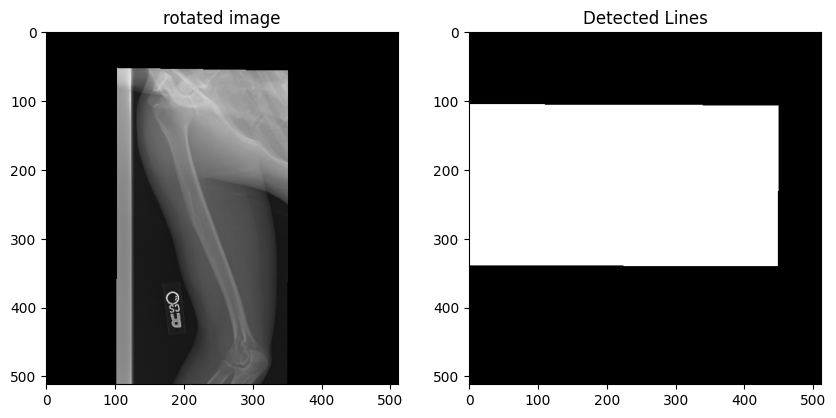

In [9]:

edges = cv2.Canny(drawn_image, 50, 150, apertureSize=3)
lines_list =[]

lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=5 # Max allowed gap between line for joining them
            )
for points in lines:
    # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    length = np.sqrt((x2 - x1)^2 + (y2 - y1)^2)
    # Draw the lines joing the points
    # On the original image
    cv2.line(drawn_image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    # lines_list[0].append([(x1,y1),(x2,y2)])
    lines_list.append(length) #get the length of the line 

longest_line = max(lines_list)
longest_line_index = lines_list.index(longest_line)
longest_line = lines[longest_line_index][0]

angle_radians = np.arctan2(longest_line[3] - longest_line[1], longest_line[2] - longest_line[0])
angle_degrees = np.degrees(angle_radians)

# get width and height of the whole image
img_original = cv2.imread(image_path)
height, width = img_original.shape[:2]
orig_center = (width // 2, height // 2)

rotation_matrix = cv2.getRotationMatrix2D(orig_center, angle_degrees, 1) #1 is image zoom
rotated_image = cv2.warpAffine(im_gray, rotation_matrix, (height,width))

if angle_degrees <= 0:
    rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
elif angle_degrees > 0:
    rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)

#center of the rectangle
side_lengths = np.linalg.norm(np.diff(best_rect, axis=0), axis=1)
width_rect = min(side_lengths)
height_rect = max(side_lengths)
rect_center = (width_rect // 2, height_rect // 2)

#move the object to the center 
print(orig_center)
print(rect_center)     
# Calculate the translation vector
dx = (orig_center[0] - width_rect) + width_rect
dy = (orig_center[1] - height_rect) + height_rect



# Perform translation
translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
translated_image = cv2.warpAffine(rotated_image, translation_matrix, (im_gray.shape[1], im_gray.shape[0]))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rotated_image, cmap='gray')
ax[0].set_title("rotated image")
ax[1].imshow(drawn_image, cmap='gray')
ax[1].set_title("Detected Lines")

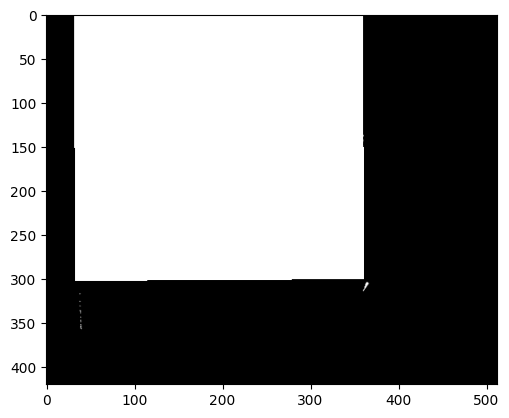

In [10]:
contours, _ = cv2.findContours(np.uint8(rotated_image), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

best_rect = None
best_rect_area = 0

# Iterate through all contours and find the best fitting rectangle
for contour in contours:
    # Fit a rotated rectangle around the contour
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box_area = rect[1][0] * rect[1][1]

    # Check if the current rectangle has larger area than the previous best
    if box_area > best_rect_area:
        best_rect = box
        best_rect_area = box_area

# Draw the rotated rectangle on the original image
original_image = np.array(rotated_image)
drawn_image = original_image.copy()
cv2.drawContours(drawn_image, [np.int0(best_rect)], 0, (255, 255, 255), -1)



plt.imshow(drawn_image, cmap='gray')
plt.show()

In [1]:
import houghBoxRotate

folder_path = "/home/clr/Thesis/HoughTransform_xray/sample_img/" 
output_folder = "/home/clr/Thesis/HoughTransform_xray/output1/" 
skipped_images = '/home/clr/Thesis/HoughTransform_xray/skipped_images/'
image_output, skipped_images = houghBoxRotate.houghT_rotate(folder_path, output_folder, skipped_images)

/home/clr/Thesis/HoughTransform_xray/houghBoxRotate.py:46: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt((x2 - x1)^2 + (y2 - y1)^2)


1


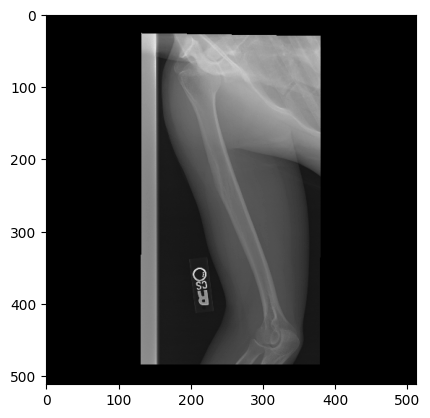

In [3]:
import matplotlib.pyplot as plt
print(len(image_output))
plt.imshow(image_output[0], cmap='gray')

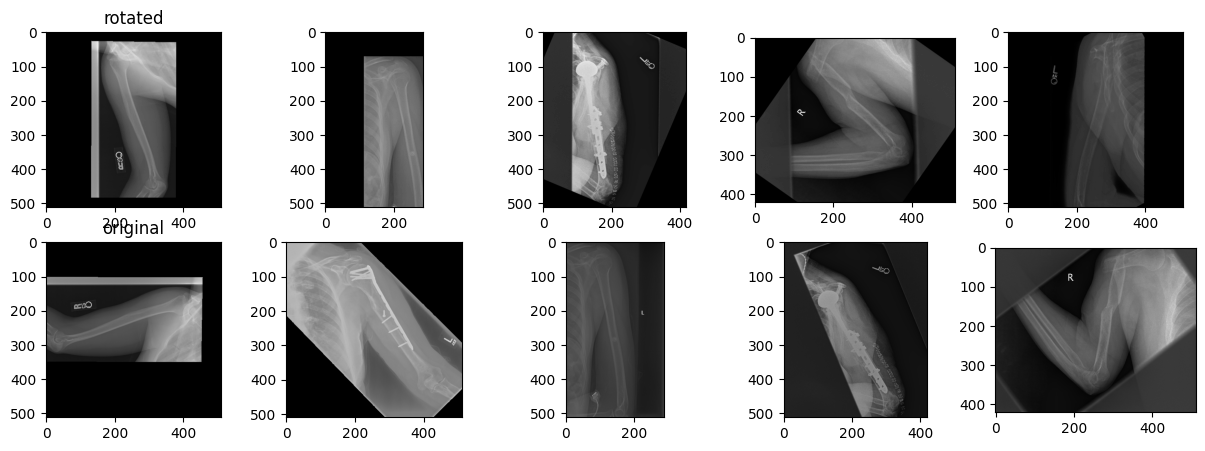

In [45]:
folder_path= "/home/clr/Thesis/HoughTransform_xray/sample images/"
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax[0][0].imshow(image_output[5], cmap='gray')
ax[0][0].set_title("rotated")
ax[0][1].imshow(image_output[6], cmap='gray')
ax[0][2].imshow(image_output[7], cmap='gray')
ax[0][3].imshow(image_output[8], cmap='gray')
ax[0][4].imshow(image_output[9], cmap='gray')
ax[1][0].imshow(cv2.imread(folder_path+image_files[5]), cmap='gray')
ax[1][0].set_title("original")
ax[1][1].imshow(cv2.imread(folder_path+image_files[6]), cmap='gray')
ax[1][2].imshow(cv2.imread(folder_path+image_files[7]), cmap='gray')
ax[1][3].imshow(cv2.imread(folder_path+image_files[8]), cmap='gray')
ax[1][4].imshow(cv2.imread(folder_path+image_files[9]), cmap='gray')